In [1]:
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import wcs
from astropy import table
from astropy import units as u
import pylab as pl
pl.rcParams['figure.facecolor'] = 'w'

In [2]:
cd /orange/adamginsburg/jwst/jw02731/L3/t

/orange/adamginsburg/jwst/jw02731/L3/t


In [3]:
ls *.ecsv

GAIA_catalog.ecsv
jw02731-o001_t017_nircam_clear-f090w_cat.ecsv
jw02731-o001_t017_nircam_clear-f187n_cat.ecsv
jw02731-o001_t017_nircam_clear-f200w_cat.ecsv
jw02731-o001_t017_nircam_clear-f335m_cat.ecsv
jw02731-o001_t017_nircam_clear-f444w_cat.ecsv
jw02731-o001_t017_nircam_f444w-f470n_cat.ecsv
jw02731-o002_t017_miri_f1130w_cat.ecsv
jw02731-o002_t017_miri_f1280w_cat.ecsv
jw02731-o002_t017_miri_f1800w_cat.ecsv
jw02731-o002_t017_miri_f770w_cat.ecsv
photometry_tables_merged.ecsv


In [4]:
import glob

In [5]:
ignored_columns = ['sky_bbox_ll',
 'sky_bbox_ul',
 'sky_bbox_lr',
 'sky_bbox_ur']

In [6]:
basetable = Table.read('jw02731-o001_t017_nircam_clear-f444w_cat.ecsv')
basecrds = basetable['sky_centroid']
for colname in basetable.colnames:
    basetable.rename_column(colname, colname+"_f444w")
basetable = basetable[[cn for cn in basetable.colnames if not any(x in cn for x in ignored_columns)]]

for fn in glob.glob("jw02731*.ecsv"):
    print(fn)
    if 'f444w' in fn:
        continue
    tbl = Table.read(fn)
    tbl = tbl[[cn for cn in tbl.colnames if not any(x in cn for x in ignored_columns)]]
    crds = tbl['sky_centroid']
    wl = fn.split("_")[3] if 'miri' in fn else fn.split("_")[3].split("-")[-1]
    assert wl[0] == 'f'
    matches, sep, _ = basecrds.match_to_catalog_sky(crds, nthneighbor=1)
    basetable.add_column(name=f"sep_{wl}", col=sep)
    basetable.add_column(name=f"id_{wl}", col=matches)
    matchtb = tbl[matches]
    for cn in matchtb.colnames:
        #matchtb[cn][sep > 0.1*u.arcsec].mask = True
        matchtb.rename_column(cn, f"{cn}_{wl}")
    basetable = table.hstack([basetable, matchtb], join_type='exact')
    #if 'sky_centroid_f444w' in basetable.colnames:
    #    basetable.rename_column('sky_centroid_f444w', 'sky_centroid')
    #basetable = table.join(basetable, tbl,
    #                      table_names=['', wl],
    #                      join_type='outer',
    #                      join_funcs={'sky_centroid': table.join_skycoord(0.1*u.arcsec)})
    #if 'sky_centroid_' in basetable.colnames:
    #    basetable.rename_column('sky_centroid_', 'sky_centroid_f444w')
    basetable.write("photometry_tables_merged.ecsv", overwrite=True)

jw02731-o001_t017_nircam_f444w-f470n_cat.ecsv
jw02731-o002_t017_miri_f1800w_cat.ecsv


jw02731-o002_t017_miri_f1130w_cat.ecsv


jw02731-o001_t017_nircam_clear-f335m_cat.ecsv


jw02731-o001_t017_nircam_clear-f444w_cat.ecsv
jw02731-o001_t017_nircam_clear-f200w_cat.ecsv


jw02731-o002_t017_miri_f1280w_cat.ecsv


jw02731-o001_t017_nircam_clear-f090w_cat.ecsv


jw02731-o002_t017_miri_f770w_cat.ecsv


jw02731-o001_t017_nircam_clear-f187n_cat.ecsv


In [7]:
basetable

label_f444w,xcentroid_f444w,ycentroid_f444w,sky_centroid_f444w,aper_bkg_flux_f444w,aper_bkg_flux_err_f444w,aper30_flux_f444w,aper30_flux_err_f444w,aper50_flux_f444w,aper50_flux_err_f444w,aper70_flux_f444w,aper70_flux_err_f444w,aper_total_flux_f444w,aper_total_flux_err_f444w,aper30_abmag_f444w,aper30_abmag_err_f444w,aper50_abmag_f444w,aper50_abmag_err_f444w,aper70_abmag_f444w,aper70_abmag_err_f444w,aper_total_abmag_f444w,aper_total_abmag_err_f444w,aper30_vegamag_f444w,aper30_vegamag_err_f444w,aper50_vegamag_f444w,aper50_vegamag_err_f444w,aper70_vegamag_f444w,aper70_vegamag_err_f444w,aper_total_vegamag_f444w,aper_total_vegamag_err_f444w,CI_50_30_f444w,CI_70_50_f444w,CI_70_30_f444w,is_extended_f444w,sharpness_f444w,roundness_f444w,nn_label_f444w,nn_dist_f444w,isophotal_flux_f444w,isophotal_flux_err_f444w,isophotal_abmag_f444w,isophotal_abmag_err_f444w,isophotal_vegamag_f444w,isophotal_vegamag_err_f444w,isophotal_area_f444w,semimajor_sigma_f444w,semiminor_sigma_f444w,ellipticity_f444w,orientation_f444w,sky_orientation_f444w,sep_f1800w,id_f1800w,label_f1800w,xcentroid_f1800w,ycentroid_f1800w,sky_centroid_f1800w,aper_bkg_flux_f1800w,aper_bkg_flux_err_f1800w,aper30_flux_f1800w,aper30_flux_err_f1800w,aper50_flux_f1800w,aper50_flux_err_f1800w,aper70_flux_f1800w,aper70_flux_err_f1800w,aper_total_flux_f1800w,aper_total_flux_err_f1800w,aper30_abmag_f1800w,aper30_abmag_err_f1800w,aper50_abmag_f1800w,aper50_abmag_err_f1800w,aper70_abmag_f1800w,aper70_abmag_err_f1800w,aper_total_abmag_f1800w,aper_total_abmag_err_f1800w,aper30_vegamag_f1800w,aper30_vegamag_err_f1800w,aper50_vegamag_f1800w,aper50_vegamag_err_f1800w,aper70_vegamag_f1800w,aper70_vegamag_err_f1800w,aper_total_vegamag_f1800w,aper_total_vegamag_err_f1800w,CI_50_30_f1800w,CI_70_50_f1800w,CI_70_30_f1800w,is_extended_f1800w,sharpness_f1800w,roundness_f1800w,nn_label_f1800w,nn_dist_f1800w,isophotal_flux_f1800w,isophotal_flux_err_f1800w,isophotal_abmag_f1800w,isophotal_abmag_err_f1800w,isophotal_vegamag_f1800w,isophotal_vegamag_err_f1800w,isophotal_area_f1800w,semimajor_sigma_f1800w,semiminor_sigma_f1800w,ellipticity_f1800w,orientation_f1800w,sky_orientation_f1800w,sep_f1130w,id_f1130w,label_f1130w,xcentroid_f1130w,ycentroid_f1130w,sky_centroid_f1130w,aper_bkg_flux_f1130w,aper_bkg_flux_err_f1130w,aper30_flux_f1130w,aper30_flux_err_f1130w,aper50_flux_f1130w,aper50_flux_err_f1130w,aper70_flux_f1130w,aper70_flux_err_f1130w,aper_total_flux_f1130w,aper_total_flux_err_f1130w,aper30_abmag_f1130w,aper30_abmag_err_f1130w,aper50_abmag_f1130w,aper50_abmag_err_f1130w,aper70_abmag_f1130w,aper70_abmag_err_f1130w,aper_total_abmag_f1130w,aper_total_abmag_err_f1130w,aper30_vegamag_f1130w,aper30_vegamag_err_f1130w,aper50_vegamag_f1130w,aper50_vegamag_err_f1130w,aper70_vegamag_f1130w,aper70_vegamag_err_f1130w,aper_total_vegamag_f1130w,aper_total_vegamag_err_f1130w,CI_50_30_f1130w,CI_70_50_f1130w,CI_70_30_f1130w,is_extended_f1130w,sharpness_f1130w,roundness_f1130w,nn_label_f1130w,nn_dist_f1130w,isophotal_flux_f1130w,isophotal_flux_err_f1130w,isophotal_abmag_f1130w,isophotal_abmag_err_f1130w,isophotal_vegamag_f1130w,isophotal_vegamag_err_f1130w,isophotal_area_f1130w,semimajor_sigma_f1130w,semiminor_sigma_f1130w,ellipticity_f1130w,orientation_f1130w,sky_orientation_f1130w,sep_f335m,id_f335m,label_f335m,xcentroid_f335m,ycentroid_f335m,sky_centroid_f335m,aper_bkg_flux_f335m,aper_bkg_flux_err_f335m,aper30_flux_f335m,aper30_flux_err_f335m,aper50_flux_f335m,aper50_flux_err_f335m,aper70_flux_f335m,aper70_flux_err_f335m,aper_total_flux_f335m,aper_total_flux_err_f335m,aper30_abmag_f335m,aper30_abmag_err_f335m,aper50_abmag_f335m,aper50_abmag_err_f335m,aper70_abmag_f335m,aper70_abmag_err_f335m,aper_total_abmag_f335m,aper_total_abmag_err_f335m,aper30_vegamag_f335m,aper30_vegamag_err_f335m,aper50_vegamag_f335m,aper50_vegamag_err_f335m,aper70_vegamag_f335m,aper70_vegamag_err_f335m,aper_total_vegamag_f335m,aper_total_vegamag_err_f335m,CI_50_30_f335m,CI_70_50_f335m,CI_70_30_f335m,is_extended_f335m,sharpness_f335m,roundness

In [21]:
import pylab as pl
pl.rcParams['figure.facecolor'] = 'w'
import numpy as np

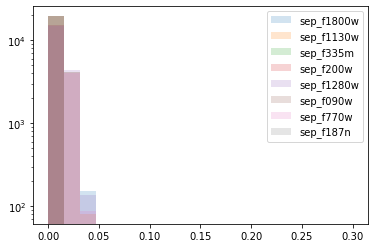

In [22]:
pl.figure(facecolor='w')
for cn in basetable.colnames:
    if 'sep' in cn:
        pl.hist(basetable[cn],
                label=cn,
               bins=np.linspace(0.0, 0.3, 20),
                alpha=0.2, log=True)
pl.legend(loc='best')

In [11]:
import regions
from astropy.io import fits
rois = regions.Regions.read('/orange/adamginsburg/jwst/jw02731/ROIs.reg')

In [12]:
r0, r1 = rois

In [13]:
ww = wcs.WCS(fits.getheader('jw02731-o001_t017_nircam_clear-f444w_i2d.fits', ext=1))

Set DATE-AVG to '2022-06-03T12:45:26.346' from MJD-AVG.
Set DATE-END to '2022-06-03T15:22:38.772' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -31.574327 from OBSGEO-[XYZ].
Set OBSGEO-H to 1654444171.915 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


(-1.0, 5.0, 28.0, 18.0)

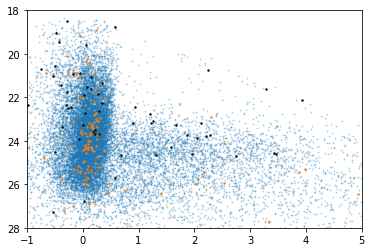

In [24]:
in_r0 = r0.contains(basetable['sky_centroid_f444w'], wcs=ww)
in_r1 = r1.contains(basetable['sky_centroid_f444w'], wcs=ww)
pl.scatter((basetable['aper30_abmag_f444w']-basetable['aper30_abmag_f335m']),
           basetable['aper30_abmag_f444w'], 
          s=1, alpha=0.25)
pl.scatter((basetable['aper30_abmag_f444w']-basetable['aper30_abmag_f335m'])[in_r0],
           basetable['aper30_abmag_f444w'][in_r0], 
          s=2, alpha=0.9)
pl.scatter((basetable['aper30_abmag_f444w']-basetable['aper30_abmag_f335m'])[in_r1],
           basetable['aper30_abmag_f444w'][in_r1], 
          s=2, alpha=0.9, c='k')
pl.axis([-1,5,28,18])

In [25]:
from astropy.visualization import simple_norm

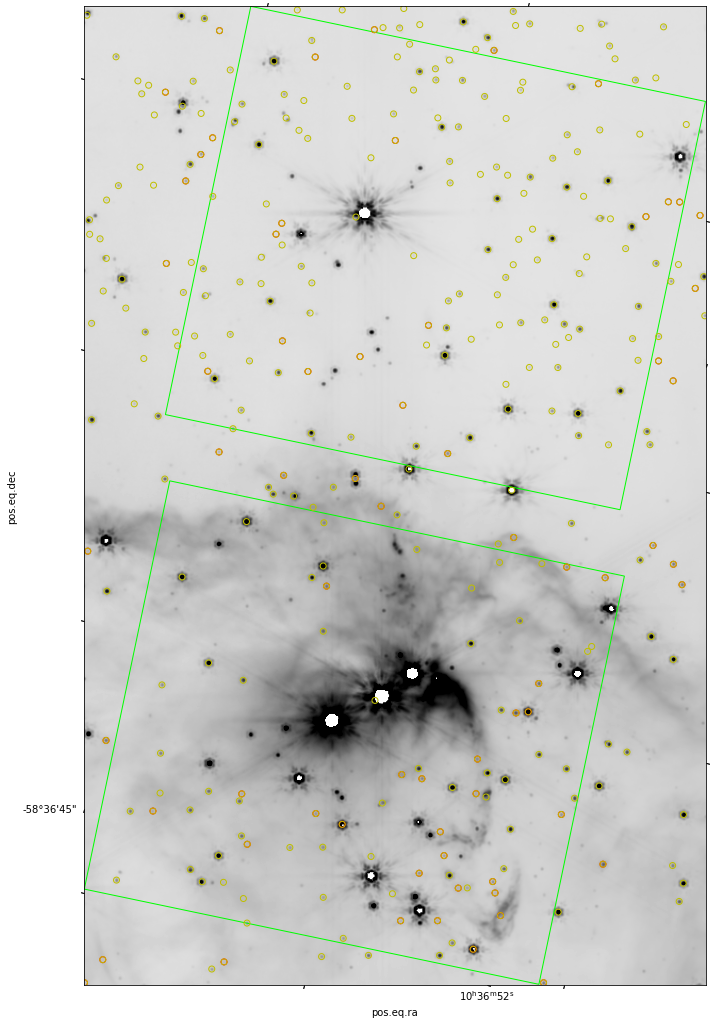

In [26]:
mask = (r0|r1).to_pixel(ww).to_mask()
data = fits.getdata('jw02731-o001_t017_nircam_clear-f444w_i2d.fits', ext=1)
mdata = mask.cutout(data)
bigslc, smlslc = mask.bbox.get_overlap_slices(data.shape)

pl.figure(figsize=(12,18))
ax = pl.subplot(projection=ww[bigslc])
ax.imshow(mdata, norm=simple_norm(mdata, min_percent=0.01, max_percent=99.5, stretch='asinh'), cmap='gray_r')
r0.to_pixel(ww[bigslc]).plot(ax=ax)
r1.to_pixel(ww[bigslc]).plot(ax=ax)

crds = basetable['sky_centroid_f444w']
sel = (basetable['aper30_abmag_f444w']-basetable['aper30_abmag_f335m']) > 0.5
sel &= mask.bbox.to_region().to_sky(ww).contains(crds, wcs=ww)
ax.scatter(crds.ra[sel], crds.dec[sel], transform=ax.get_transform('world'), facecolor='none', edgecolor='r')

sel = mask.bbox.to_region().to_sky(ww).contains(crds, wcs=ww)
ax.scatter(crds.ra[sel], crds.dec[sel], transform=ax.get_transform('world'), facecolor='none', edgecolor='y', alpha=1)

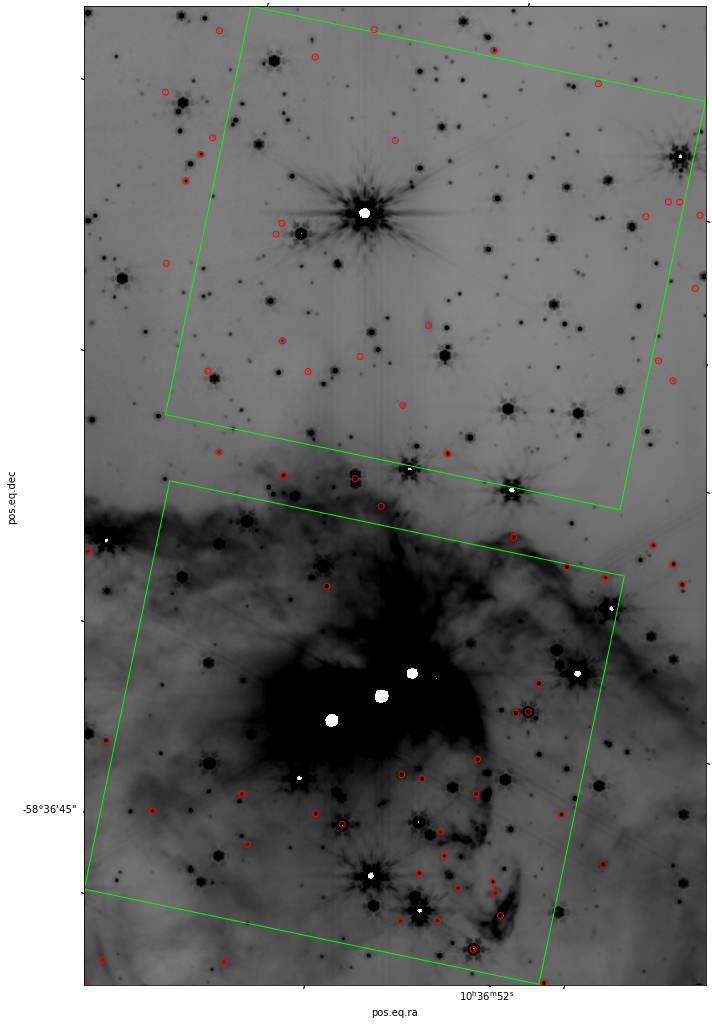

In [27]:
mask = (r0|r1).to_pixel(ww).to_mask()
data = fits.getdata('jw02731-o001_t017_nircam_clear-f444w_i2d.fits', ext=1)
mdata = mask.cutout(data)
bigslc, smlslc = mask.bbox.get_overlap_slices(data.shape)

pl.figure(figsize=(12,18))
ax = pl.subplot(projection=ww[bigslc])
ax.imshow(mdata, norm=simple_norm(mdata, min_percent=0.01, max_percent=95, stretch='asinh'), cmap='gray_r')
r0.to_pixel(ww[bigslc]).plot(ax=ax)
r1.to_pixel(ww[bigslc]).plot(ax=ax)

crds = basetable['sky_centroid_f444w']
sel = (basetable['aper30_abmag_f444w']-basetable['aper30_abmag_f335m']) > 0.5
sel &= mask.bbox.to_region().to_sky(ww).contains(crds, wcs=ww)
ax.scatter(crds.ra[sel], crds.dec[sel], transform=ax.get_transform('world'), facecolor='none', edgecolor='r')

#sel = mask.bbox.to_region().to_sky(ww).contains(crds, wcs=ww)
#ax.scatter(crds.ra[sel], crds.dec[sel], transform=ax.get_transform('world'), facecolor='none', edgecolor='y', alpha=1)

In [28]:
wavelengths = [int(x.split("_")[-1][1:-1])
               for x in basetable.colnames
               if 'aper30_abmag_f' in x]*u.nm
wavelengths

<Quantity [ 444., 1800., 1130.,  335.,  200., 1280.,   90.,  770.,  187.] nm>

In [29]:
basetable.sort('aper30_flux_f444w')

In [30]:
basetable[-5:]

label_f444w,xcentroid_f444w,ycentroid_f444w,sky_centroid_f444w,aper_bkg_flux_f444w,aper_bkg_flux_err_f444w,aper30_flux_f444w,aper30_flux_err_f444w,aper50_flux_f444w,aper50_flux_err_f444w,aper70_flux_f444w,aper70_flux_err_f444w,aper_total_flux_f444w,aper_total_flux_err_f444w,aper30_abmag_f444w,aper30_abmag_err_f444w,aper50_abmag_f444w,aper50_abmag_err_f444w,aper70_abmag_f444w,aper70_abmag_err_f444w,aper_total_abmag_f444w,aper_total_abmag_err_f444w,aper30_vegamag_f444w,aper30_vegamag_err_f444w,aper50_vegamag_f444w,aper50_vegamag_err_f444w,aper70_vegamag_f444w,aper70_vegamag_err_f444w,aper_total_vegamag_f444w,aper_total_vegamag_err_f444w,CI_50_30_f444w,CI_70_50_f444w,CI_70_30_f444w,is_extended_f444w,sharpness_f444w,roundness_f444w,nn_label_f444w,nn_dist_f444w,isophotal_flux_f444w,isophotal_flux_err_f444w,isophotal_abmag_f444w,isophotal_abmag_err_f444w,isophotal_vegamag_f444w,isophotal_vegamag_err_f444w,isophotal_area_f444w,semimajor_sigma_f444w,semiminor_sigma_f444w,ellipticity_f444w,orientation_f444w,sky_orientation_f444w,sep_f1800w,id_f1800w,label_f1800w,xcentroid_f1800w,ycentroid_f1800w,sky_centroid_f1800w,aper_bkg_flux_f1800w,aper_bkg_flux_err_f1800w,aper30_flux_f1800w,aper30_flux_err_f1800w,aper50_flux_f1800w,aper50_flux_err_f1800w,aper70_flux_f1800w,aper70_flux_err_f1800w,aper_total_flux_f1800w,aper_total_flux_err_f1800w,aper30_abmag_f1800w,aper30_abmag_err_f1800w,aper50_abmag_f1800w,aper50_abmag_err_f1800w,aper70_abmag_f1800w,aper70_abmag_err_f1800w,aper_total_abmag_f1800w,aper_total_abmag_err_f1800w,aper30_vegamag_f1800w,aper30_vegamag_err_f1800w,aper50_vegamag_f1800w,aper50_vegamag_err_f1800w,aper70_vegamag_f1800w,aper70_vegamag_err_f1800w,aper_total_vegamag_f1800w,aper_total_vegamag_err_f1800w,CI_50_30_f1800w,CI_70_50_f1800w,CI_70_30_f1800w,is_extended_f1800w,sharpness_f1800w,roundness_f1800w,nn_label_f1800w,nn_dist_f1800w,isophotal_flux_f1800w,isophotal_flux_err_f1800w,isophotal_abmag_f1800w,isophotal_abmag_err_f1800w,isophotal_vegamag_f1800w,isophotal_vegamag_err_f1800w,isophotal_area_f1800w,semimajor_sigma_f1800w,semiminor_sigma_f1800w,ellipticity_f1800w,orientation_f1800w,sky_orientation_f1800w,sep_f1130w,id_f1130w,label_f1130w,xcentroid_f1130w,ycentroid_f1130w,sky_centroid_f1130w,aper_bkg_flux_f1130w,aper_bkg_flux_err_f1130w,aper30_flux_f1130w,aper30_flux_err_f1130w,aper50_flux_f1130w,aper50_flux_err_f1130w,aper70_flux_f1130w,aper70_flux_err_f1130w,aper_total_flux_f1130w,aper_total_flux_err_f1130w,aper30_abmag_f1130w,aper30_abmag_err_f1130w,aper50_abmag_f1130w,aper50_abmag_err_f1130w,aper70_abmag_f1130w,aper70_abmag_err_f1130w,aper_total_abmag_f1130w,aper_total_abmag_err_f1130w,aper30_vegamag_f1130w,aper30_vegamag_err_f1130w,aper50_vegamag_f1130w,aper50_vegamag_err_f1130w,aper70_vegamag_f1130w,aper70_vegamag_err_f1130w,aper_total_vegamag_f1130w,aper_total_vegamag_err_f1130w,CI_50_30_f1130w,CI_70_50_f1130w,CI_70_30_f1130w,is_extended_f1130w,sharpness_f1130w,roundness_f1130w,nn_label_f1130w,nn_dist_f1130w,isophotal_flux_f1130w,isophotal_flux_err_f1130w,isophotal_abmag_f1130w,isophotal_abmag_err_f1130w,isophotal_vegamag_f1130w,isophotal_vegamag_err_f1130w,isophotal_area_f1130w,semimajor_sigma_f1130w,semiminor_sigma_f1130w,ellipticity_f1130w,orientation_f1130w,sky_orientation_f1130w,sep_f335m,id_f335m,label_f335m,xcentroid_f335m,ycentroid_f335m,sky_centroid_f335m,aper_bkg_flux_f335m,aper_bkg_flux_err_f335m,aper30_flux_f335m,aper30_flux_err_f335m,aper50_flux_f335m,aper50_flux_err_f335m,aper70_flux_f335m,aper70_flux_err_f335m,aper_total_flux_f335m,aper_total_flux_err_f335m,aper30_abmag_f335m,aper30_abmag_err_f335m,aper50_abmag_f335m,aper50_abmag_err_f335m,aper70_abmag_f335m,aper70_abmag_err_f335m,aper_total_abmag_f335m,aper_total_abmag_err_f335m,aper30_vegamag_f335m,aper30_vegamag_err_f335m,aper50_vegamag_f335m,aper50_vegamag_err_f335m,aper70_vegamag_f335m,aper70_vegamag_err_f335m,aper_total_vegamag_f335m,aper_total_vegamag_err_f335m,CI_50_30_f335m,CI_70_50_f335m,CI_70_30_f335m,is_extended_f335m,sharpness_f335m,roundness

In [31]:
def fixrow(row):
    return np.lib.recfunctions.structured_to_unstructured(np.array(row))

Text(0.5, 0, 'Wavelength [$\\mu$m]')

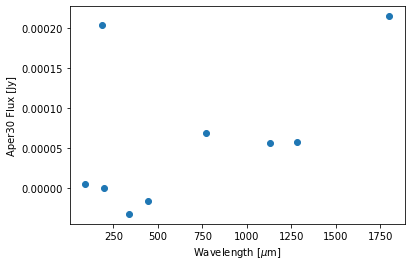

In [32]:
fcols = [cn for cn in basetable.colnames if 'aper30_flux_f' in cn]
pl.plot(wavelengths, fixrow(basetable[fcols][0]), 'o')
pl.ylabel("Aper30 Flux [Jy]")
pl.xlabel("Wavelength [$\mu$m]")

Text(0.5, 0, 'Wavelength [$\\mu$m]')

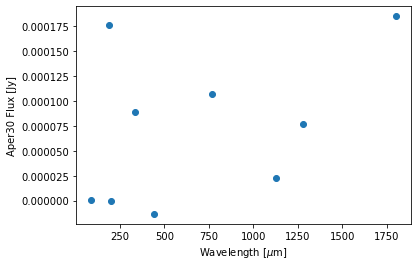

In [33]:
fcols = [cn for cn in basetable.colnames if 'aper30_flux_f' in cn]
pl.plot(wavelengths, fixrow(basetable[fcols][1]), 'o')
pl.ylabel("Aper30 Flux [Jy]")
pl.xlabel("Wavelength [$\mu$m]")

Text(0.5, 0, 'Wavelength [$\\mu$m]')

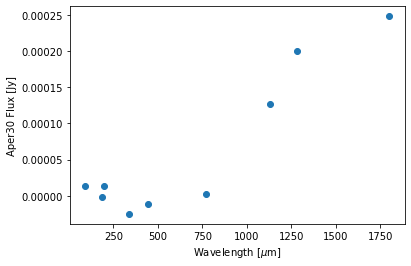

In [34]:
fcols = [cn for cn in basetable.colnames if 'aper30_flux_f' in cn]
pl.plot(wavelengths, fixrow(basetable[fcols][2]), 'o')
pl.ylabel("Aper30 Flux [Jy]")
pl.xlabel("Wavelength [$\mu$m]")

Text(0.5, 0, 'Wavelength [$\\mu$m]')

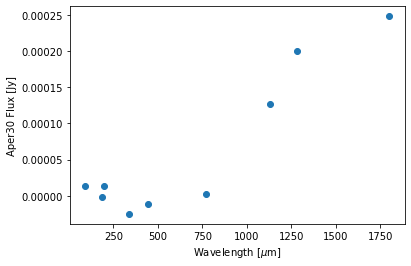

In [35]:
fcols = [cn for cn in basetable.colnames if 'aper30_flux_f' in cn]
pl.plot(wavelengths, fixrow(basetable[fcols][2]), 'o')
pl.ylabel("Aper30 Flux [Jy]")
pl.xlabel("Wavelength [$\mu$m]")

Text(0.5, 0, 'Wavelength [$\\mu$m]')

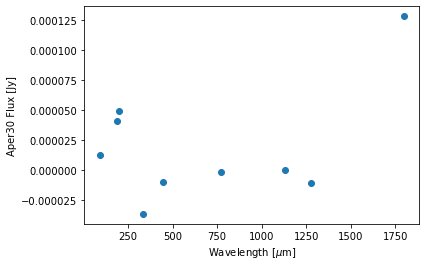

In [36]:
fcols = [cn for cn in basetable.colnames if 'aper30_flux_f' in cn]
pl.plot(wavelengths, fixrow(basetable[fcols][3]), 'o')
pl.ylabel("Aper30 Flux [Jy]")
pl.xlabel("Wavelength [$\mu$m]")

Text(0.5, 0, 'Wavelength [$\\mu$m]')

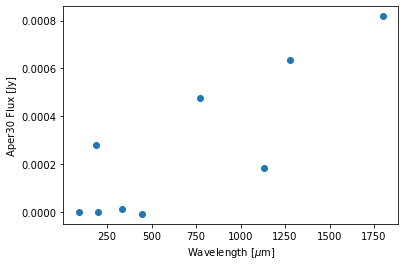

In [37]:
fcols = [cn for cn in basetable.colnames if 'aper30_flux_f' in cn]
pl.plot(wavelengths, fixrow(basetable[fcols][4]), 'o')
pl.ylabel("Aper30 Flux [Jy]")
pl.xlabel("Wavelength [$\mu$m]")

Text(0.5, 0, 'Wavelength [$\\mu$m]')

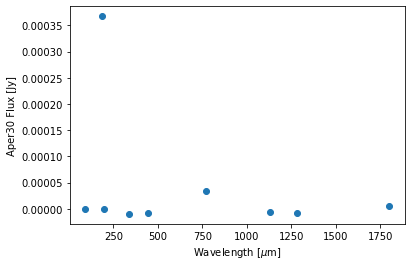

In [38]:
fcols = [cn for cn in basetable.colnames if 'aper30_flux_f' in cn]
pl.plot(wavelengths, fixrow(basetable[fcols][5]), 'o')
pl.ylabel("Aper30 Flux [Jy]")
pl.xlabel("Wavelength [$\mu$m]")

In [39]:
wavelengths

<Quantity [ 444., 1800., 1130.,  335.,  200., 1280.,   90.,  770.,  187.] nm>

In [40]:
b18um = basetable['aper30_abmag_f1800w'] < 16

(-4.0, 5.0, 23.0, 14.0)

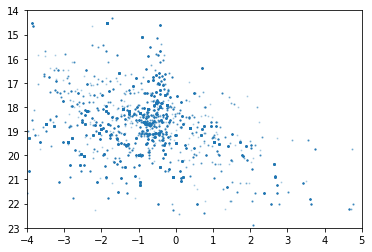

In [41]:
pl.scatter(basetable['aper30_abmag_f1800w']-basetable['aper30_abmag_f1280w'],
           basetable['aper30_abmag_f1800w'], 
          s=1, alpha=0.25)
pl.axis([-4,5,23,14])

(-5.0, 5.0, -5.0, 5.0)

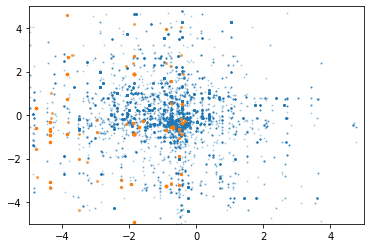

In [42]:
pl.scatter(basetable['aper30_abmag_f1800w']-basetable['aper30_abmag_f1280w'],
           basetable['aper30_abmag_f1130w']-basetable['aper30_abmag_f770w'], 
          s=1, alpha=0.25)
pl.scatter(basetable['aper30_abmag_f1800w'][b18um]-basetable['aper30_abmag_f1280w'][b18um],
           basetable['aper30_abmag_f1130w'][b18um]-basetable['aper30_abmag_f770w'][b18um], 
          s=5, alpha=0.5)
pl.axis([-5,5,-5,5])